In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("/content/drive/MyDrive/ML_Results/preprocessed.csv")

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svm = SVC(C = 0.01, kernel = 'linear' , gamma = 1)
svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)

print("Accuracy: ", accuracy*100,'%')

Accuracy:  93.23308270676691 %


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print("Classification report for classifier %s:\n%s\n" % (
    svm, classification_report(y_test, y_pred)))


Classification report for classifier SVC(C=0.01, gamma=1, kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       346
           1       0.96      0.51      0.67        53

    accuracy                           0.93       399
   macro avg       0.95      0.75      0.81       399
weighted avg       0.93      0.93      0.92       399




In [ ]:
################# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
print(cm)

################ Accuracy
print()
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion matrix
[[345   1]
 [ 26  27]]

Model accuracy:  0.9323308270676691


([0.16352201257861634,
  0.15673981191222572,
  0.16108786610878661,
  0.15203761755485892,
  0.12672521957340024,
  0.10762800417972831,
  0.0931899641577061,
  0.0877742946708464,
  0.08362369337979095,
  0.08213166144200627],
 [0.13283208020050125,
  0.13283208020050125,
  0.13283208020050125,
  0.12781954887218044,
  0.10776942355889724,
  0.10025062656641603,
  0.08771929824561403,
  0.08270676691729323,
  0.06766917293233082,
  0.06766917293233082])

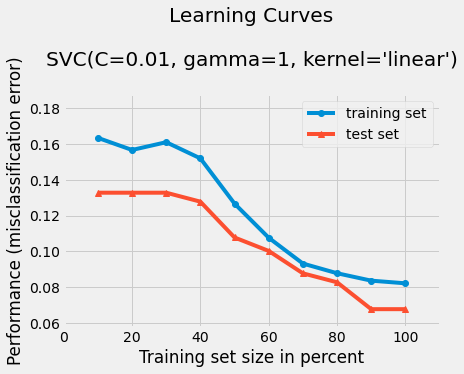

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, svm)

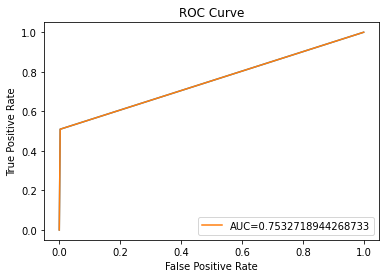

In [ ]:
################## ROC Curve
y_pred = y_pred.ravel()
fpr, tpr, _ = roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
import pickle
fileName = "/content/drive/MyDrive/ML_Results_Main/SVM_Numeric_98.model"
pickle.dump(svm, open(fileName, 'wb'))